In [1]:
cd ..

c:\Users\kawam\projekt_ai\pokemon classifier


In [2]:
import torch.nn as nn
from torchvision import datasets, transforms, models
import torch 

import os
from pokemon_classifier import get_info, classifier_trainer
import json
import plotly.graph_objs as go


c:\Users\kawam\anaconda3\envs\pokemon_classifier\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kawam\anaconda3\envs\pokemon_classifier\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
torch.cuda.memory_summary(device='cuda', abbreviated=False)
print(torch.version.cuda)

12.4


In [4]:

directory = "PokemonData"

testing_path = r"C:\Users\kawam\Desktop\pokedle"

pokemon_dir = 'path_to_your_pokemon_folder'

pokemon_image_count = {}

for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    
    if os.path.isdir(folder_path):
        num_images = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        pokemon_image_count[folder] = num_images

sorted_pokemon = sorted(pokemon_image_count.items(), key=lambda item: item[0])

pokemon_names, image_counts = zip(*sorted_pokemon)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=pokemon_names,
    y=image_counts,
    marker=dict(color='skyblue'),
    text=image_counts,  
    textposition='auto'
))

fig.update_layout(
    title="Number of Images per Pokémon Folder",
    xaxis_title="Pokémon",
    yaxis_title="Number of Images",
    xaxis_tickangle=-90, 
    showlegend=False,
    template="plotly_white"
)

fig.show()

In [5]:
dataset = datasets.ImageFolder(directory)

class_names=dataset.classes
num_of_classes = len(class_names)

with open('class_names.json', 'w') as f:
    json.dump(class_names, f)

In [6]:
train_transform =  transforms.Compose([
    transforms.RandomRotation(20),     
    transforms.RandomHorizontalFlip(),  
    transforms.Resize((360,360)),
    transforms.RandomResizedCrop(size=(224, 244), scale=(0.5, 1.0)),             
    #transforms.RandomAffine(degrees=0, shear=20, scale=(0.8,1.2)),  
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])
])


In [7]:
model = models.efficientnet_b0(pretrained=True)

num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, num_of_classes)

model = model.to('cuda')

c:\Users\kawam\anaconda3\envs\pokemon_classifier\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

c:\Users\kawam\anaconda3\envs\pokemon_classifier\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.



In [9]:
checkpoint_path = 'checkpoints/checkpoint_basic.pth'
classifier_trainer(directory, 
                   checkpoint_path, 
                   train_transform, 
                   model = model, 
                   out="model_basic",
                   batch_size=32
                   )

Loading checkpoint from checkpoints/checkpoint_basic.pth...
Checkpoint loaded: start from epoch 1


Epoch 1/100:   0%|          | 0/174 [00:00<?, ?it/s]


Training interrupted, saving checkpoint...
Checkpoint saved at epoch 1
Checkpoint saved. You can resume training later.
Finished Training


RuntimeError: File \modelsmodel_basic.pth cannot be opened.

In [ ]:

model = models.efficientnet_b0(pretrained=True)

num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, num_of_classes)

model = model.to('cuda')

model.load_state_dict(torch.load('models\model_basic.pth'))
model.eval()
model.to('cuda')



C:\Users\kawam\AppData\Local\Temp\ipykernel_3960\1318206238.py:8: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

Name:  hypno
Base Experience:  169
Height:  1.6 m
Weight:  75.6 kg
Abilities: insomnia, forewarn, inner-focus


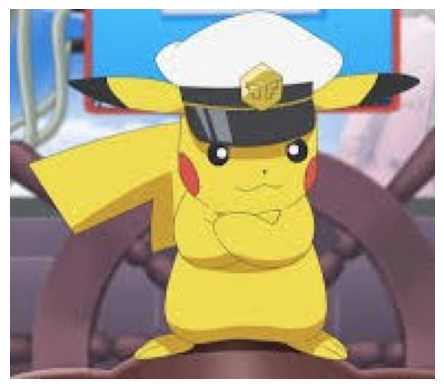

Name:  pikachu
Base Experience:  112
Height:  0.4 m
Weight:  6.0 kg
Abilities: static, lightning-rod


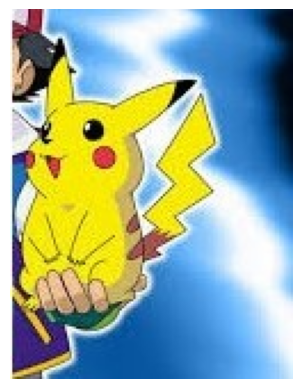

Name:  hitmonchan
Base Experience:  159
Height:  1.4 m
Weight:  50.2 kg
Abilities: keen-eye, iron-fist, inner-focus


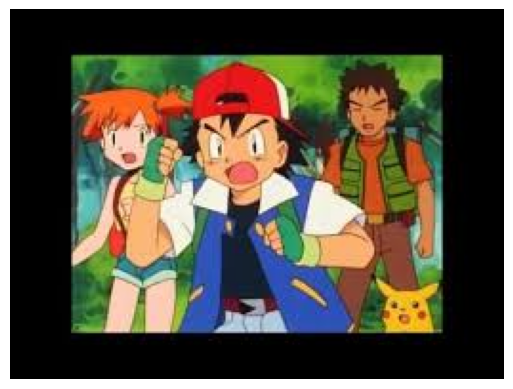

Name:  pikachu
Base Experience:  112
Height:  0.4 m
Weight:  6.0 kg
Abilities: static, lightning-rod


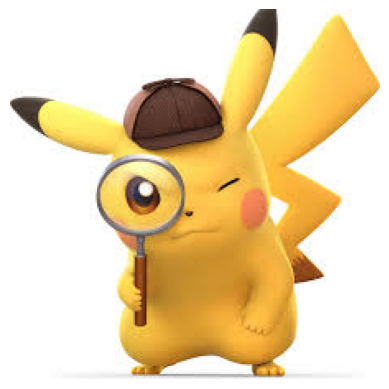

Name:  abra
Base Experience:  62
Height:  0.9 m
Weight:  19.5 kg
Abilities: synchronize, inner-focus, magic-guard


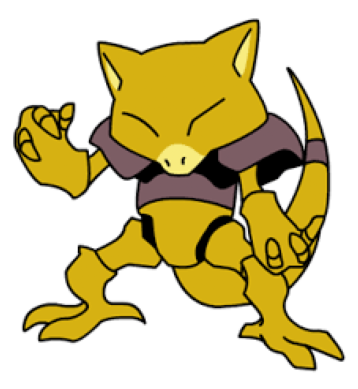

In [ ]:
test_transform =  transforms.Compose([
    transforms.Resize((224,244)),             
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])
])
for filename in os.listdir(testing_path):
    image_path = os.path.join(testing_path, filename)  
    get_info(image_path, model, test_transform, class_names) 